In [ ]:
# Installing packages

# install.packages("ggrastr")
# BiocManager::install("slingshot")
# if (!requireNamespace("BiocManager", quietly = TRUE))
# install.packages("BiocManager")
# BiocManager::install(version = "3.14")
# BiocManager::install(
#     c('BiocGenerics', 'DelayedArray', 'DelayedMatrixStats',
#        'limma', 'lme4', 'S4Vectors', 'SingleCellExperiment',
#        'SummarizedExperiment', 'batchelor', 'HDF5Array',
#        'terra', 'ggrastr'
#      )
# )
# install.packages("devtools")
# devtools::install_github('cole-trapnell-lab/monocle3')

In [1]:
library(Seurat)
library(tidyverse)
library(readr)
library(data.table)
library(viridis)
library(viridisLite)
library(slingshot)
library(monocle3)
library(RColorBrewer)
library(scales)

Attaching SeuratObject

Attaching sp

── Attaching packages ──────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ─────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: viridisLite

Loading required package: princurve

Loading required package: TrajectoryUtils

Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked fr

In [2]:
rna_counts_path <- "/path/to/dataset/processed/train_cite_inputs.csv.gz"
protein_levels_path <- "/path/to/dataset/processed/train_cite_targets.csv.gz"
metadata_path   <- "/path/to/dataset/raw/metadata.csv"

# Loading dataset

In [3]:
rna_df <- read.csv(rna_counts_path,row.names=1)
rna_df <- t(rna_df)
head(rna_df)
dim(rna_df)

45006fe3e4c8 d02759a80ba2 c016c6b0efa5 ba7f733a4f75
ENSG00000121410_A1BG     0            0            0.000000     0           
ENSG00000268895_A1BG.AS1 0            0            0.000000     0           
ENSG00000175899_A2M      0            0            0.000000     0           
ENSG00000245105_A2M.AS1  0            0            0.000000     0           
ENSG00000166535_A2ML1    0            0            0.000000     0           
ENSG00000128274_A4GALT   0            0            3.847321     0           
                         fbcf2443ffb2 d80d84ca8e89 1ac2049b4c98 33fb0c29e2e4
ENSG00000121410_A1BG     0            0            0            0           
ENSG00000268895_A1BG.AS1 0            0            0            0           
ENSG00000175899_A2M      0            0            0            0           
ENSG00000245105_A2M.AS1  0            0            0            0           
ENSG00000166535_A2ML1    0            0            0            0           
ENSG00000128274_A4GALT   0            0            0            0           
                         b329261bd0ee 703762287e88 ⋯ f901120ab887 e3780c598532
ENSG00000121410_A1BG     0.000000     0            ⋯ 0            0           
ENSG00000268895_A1BG.AS1 3.775647     0            ⋯ 0            0           
ENSG00000175899_A2M      0.000000     0            ⋯ 0            0           
ENSG00000245105_A2M.AS1  0.000000     0            ⋯ 0            0           
ENSG00000166535_A2ML1    0.000000     0            ⋯ 0            0           
ENSG00000128274_A4GALT   0.000000     0            ⋯ 0            0           
                         663da056425f 10b466d6898b 4d22a430b2b8 650ee456f0f3
ENSG00000121410_A1BG     0            0            0            0           
ENSG00000268895_A1BG.AS1 0            0            0            0           
ENSG00000175899_A2M      0            0            0            0           
ENSG00000245105_A2M.AS1  0            0            0            0           
ENSG00000166535_A2ML1    0            0            0            0           
ENSG00000128274_A4GALT   0            0            0            0           
                         cc506e7707f5 a91f1b55a520 3a9882c98205 c91b6b2ccd3d
ENSG00000121410_A1BG     0            0            0            0           
ENSG00000268895_A1BG.AS1 0            0            0            0           
ENSG00000175899_A2M      0            0            0            0           
ENSG00000245105_A2M.AS1  0            0            0            0           
ENSG00000166535_A2ML1    0            0            0            0           
ENSG00000128274_A4GALT   0            0            0            0

[1] 22050 70988

In [ ]:
# protein_df <- read.csv(protein_levels_path, row.names=1)
# protein_df <- t(protein_df)
# head(protein_df)
# dim(protein_df)

45006fe3e4c8 d02759a80ba2 c016c6b0efa5 ba7f733a4f75 fbcf2443ffb2
CD86  1.1678035    0.8189701    -0.3567033   -1.2015074   -0.1004040  
CD274 0.6225300    0.5060095    -0.4222613    0.1491148    0.6974609  
CD270 0.1069585    1.0786820    -0.8244927    2.0224676    0.6258357  
CD155 0.3249894    6.8487580     1.1374946    6.0215945   -0.2984037  
CD112 3.3316740    3.5248847     0.5189245    7.2586703    1.3698983  
CD47  6.4260015    5.2794557     7.2219620    2.7924356    3.2545214  
      d80d84ca8e89 1ac2049b4c98 33fb0c29e2e4 b329261bd0ee 703762287e88 ⋯
CD86  0.8239842    -0.2512331   -0.7129492   -0.7890341   -0.4738209   ⋯
CD274 1.6257721     0.4372891    0.7674357   -0.9694206    0.1555812   ⋯
CD270 1.8227521     0.4469264    0.3196118   -0.7789143   -0.3707700   ⋯
CD155 4.9976473     2.2872758    2.0863268    6.3750095    4.3259280   ⋯
CD112 3.7240574     4.8466077    4.7649740    2.1941361    3.5054874   ⋯
CD47  6.5185246     4.1915207    4.2264220    5.4187050    9.0685180   ⋯
      f901120ab887 e3780c598532 663da056425f 10b466d6898b 4d22a430b2b8
CD86  -0.1450976   1.3668933    -0.3642268   -0.1671680   1.9403300   
CD274 -0.3472313   0.6950015     0.1885822    1.1160793   1.3307111   
CD270  1.6988021   0.3580998     1.9714915    0.1686329   0.1282964   
CD155  6.8029770   2.2203780     5.2478237    3.7299929   4.4338350   
CD112  6.1039770   2.0717678     4.2309823    2.2068112   4.9378070   
CD47   9.7381000   2.6703062     2.3925930    2.2741294   9.2605000   
      650ee456f0f3 cc506e7707f5 a91f1b55a520 3a9882c98205 c91b6b2ccd3d
CD86  0.9054197    2.1012473    1.2213128    -0.1514325   -0.4392985  
CD274 0.3861412    2.1174620    0.4765664    -0.8500240   -0.3383270  
CD270 0.9615902    0.1126995    1.4375515     0.4615557    0.8036766  
CD155 5.0905795    2.0655117    5.1356306     3.5465605    4.7969327  
CD112 2.8543456    2.1768030    2.9261024     1.9964734    1.8226854  
CD47  6.0937290    3.9000897    1.6150811     5.7028213    3.1969056

[1]   140 70988

In [4]:
metadata_df <- read.csv(metadata_path,row.names=1) %>%
    filter(technology == "citeseq" & cell_type != "hidden")
metadata_df <- metadata_df %>%
    filter(rownames(metadata_df) %in% colnames(rna_df))
head(metadata_df)
dim(metadata_df)

day donor cell_type technology
45006fe3e4c8 2   32606 HSC       citeseq   
d02759a80ba2 2   32606 HSC       citeseq   
c016c6b0efa5 2   32606 EryP      citeseq   
ba7f733a4f75 2   32606 NeuP      citeseq   
fbcf2443ffb2 2   32606 EryP      citeseq   
d80d84ca8e89 2   32606 EryP      citeseq

[1] 70988     4

In [ ]:
# cell_list_path <- "/path/to/dataset/processed/train_cell_list.txt"
# cell_list <- read.csv(cell_list_path)$cell_id
# metadata_df <- metadata_df %>%
#     filter(rownames(metadata_df) %in% cell_list)

# Plot of number of cells collected by cell type and day

`summarise()` has grouped output by 'cell_type'. You can override using the `.groups`
argument.


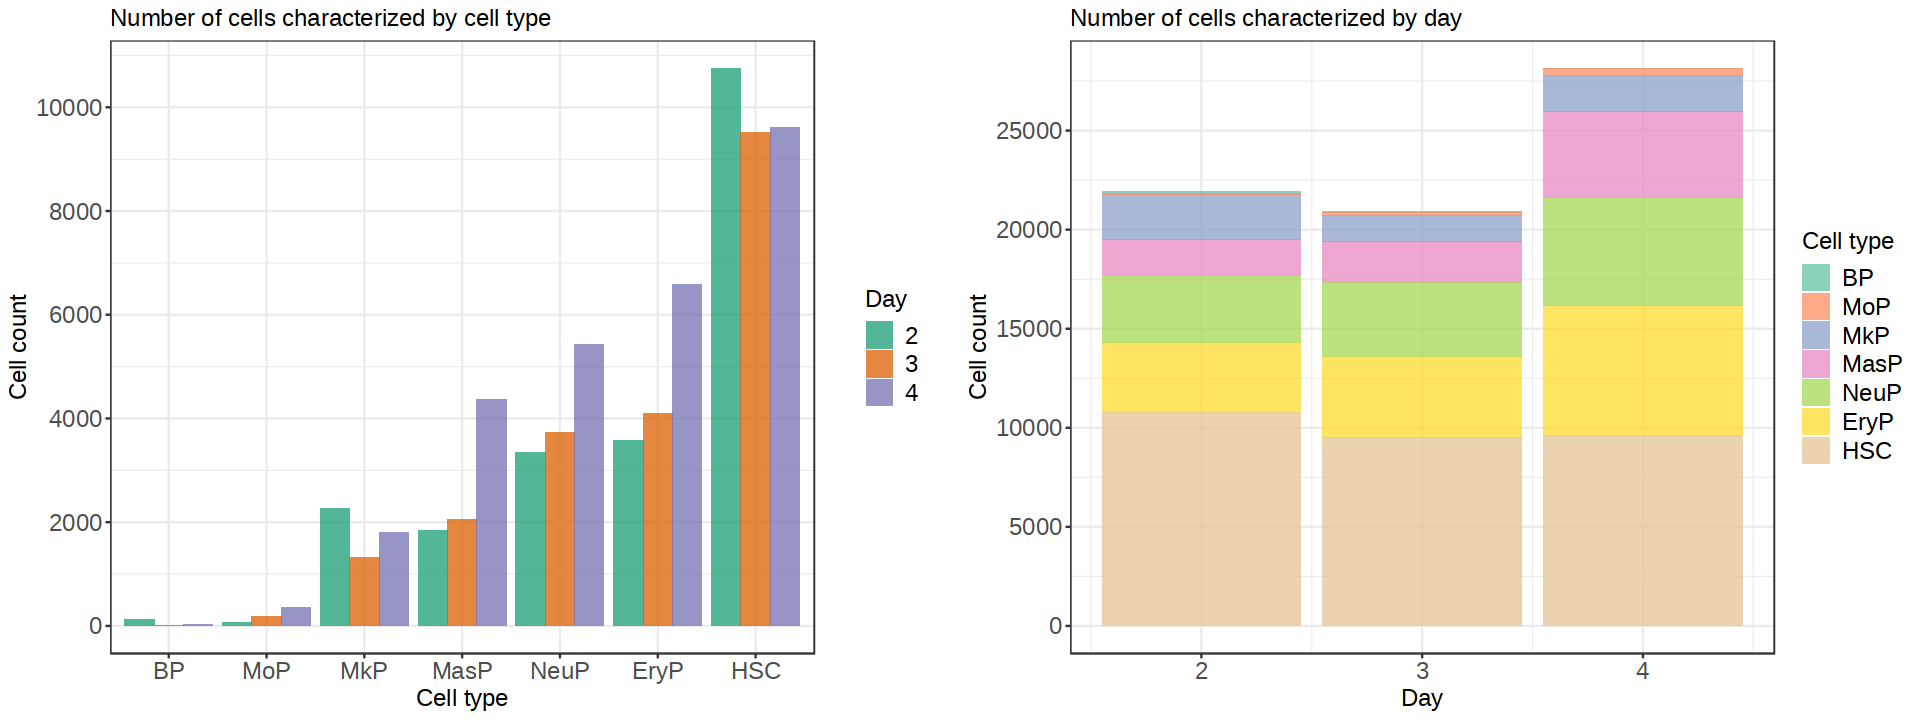

In [47]:
options(repr.plot.width=16, repr.plot.height=6)
count_by_type <- metadata_df %>% 
    group_by(cell_type) %>% 
    summarize(count=n()) %>%
    arrange(count)

processed_metadata <- metadata_df %>%
    group_by(cell_type,day) %>%
    summarize(count = n()) %>%
    ungroup() %>%
    mutate(cell_type = factor(cell_type,levels=count_by_type$cell_type))

p1 <- ggplot(processed_metadata,aes(cell_type,count,fill=factor(day))) +
    geom_bar(stat="identity", position="dodge",alpha=0.75) +
    scale_fill_brewer(palette="Dark2",name="Day") +
    scale_y_continuous(breaks=seq(0,12000,2000)) +
    labs(x="Cell type",y="Cell count",subtitle="Number of cells characterized by cell type") +
    theme_bw() +
    theme(
        axis.text = element_text(size=14),
        axis.title = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14),
        plot.subtitle = element_text(size=14)
    )

p2 <- ggplot(processed_metadata,aes(day,count,fill=factor(cell_type))) +
    geom_bar(stat="identity",position="stack", alpha=0.75) +
    scale_fill_brewer(palette="Set2",name="Cell type") +
    scale_y_continuous(breaks=seq(0,30000,5000)) +
    labs(x="Day",y="Cell count",subtitle="Number of cells characterized by day") +
    theme_bw() +
    theme(
        axis.text = element_text(size=14),
        axis.title = element_text(size=14),
        legend.text = element_text(size=14),
        legend.title = element_text(size=14),
        plot.subtitle = element_text(size=14)
    )

cowplot::plot_grid(p1,p2,align="hv")

# Creating Seurat object

In [5]:
rna <- CreateSeuratObject(
    counts=rna_df,
    project="cs547",
    assay="RNA",
    meta.data=metadata_df
)
Idents(rna) <- "cell_type"

# Don't need to double scaling and normalization
# rna <- ScaleData(rna)
# rna <- NormalizeData(rna)

rna <- SetAssayData(rna, slot="scale.data",new.data=rna_df)
rna

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


An object of class Seurat 
22050 features across 70988 samples within 1 assay 
Active assay: RNA (22050 features, 0 variable features)

In [196]:
# adt_assay <- CreateAssayObject(count=protein_df)
# rna[["ADT"]] <- adt_assay
protein <- CreateSeuratObject(
    counts=protein_df,
    project="cs547",
    meta.data=metadata_df
)
Idents(protein) <- "cell_type"
protein <- SetAssayData(protein, slot="scale.data",new.data=protein_df)
protein

An object of class Seurat 
140 features across 70988 samples within 1 assay 
Active assay: RNA (140 features, 0 variable features)

In [186]:
# DefaultAssay(rna) <- "ADT"
# DefaultAssay(rna)

[1] "ADT"

In [193]:
# DefaultAssay(rna) <- "ADT"
# options(repr.plot.width=18, repr.plot.height=6)
# DimPlot(rna, reduction="umap", split.by="day")

# DefaultAssay(rna) <- "RNA"
# options(repr.plot.width=18, repr.plot.height=6)
# DimPlot(rna, reduction="umap", split.by="day")

In [ ]:
# View metadata df, stored in rna@meta.data
# head(rna[[]])
# rna@meta.data

# Retrive specific values from the metadata
# rna$nCount_RNA
# head(rna[[c("nCount_RNA","cell_type")]])

# GetAssayData(rna,slot="counts")


# Differentially expressed genes globally

[1] "ENSG00000251562-MALAT1"   "ENSG00000197061-HIST1H4C"
[3] "ENSG00000100097-LGALS1"

Warning message:
“Transformation introduced infinite values in continuous x-axis”


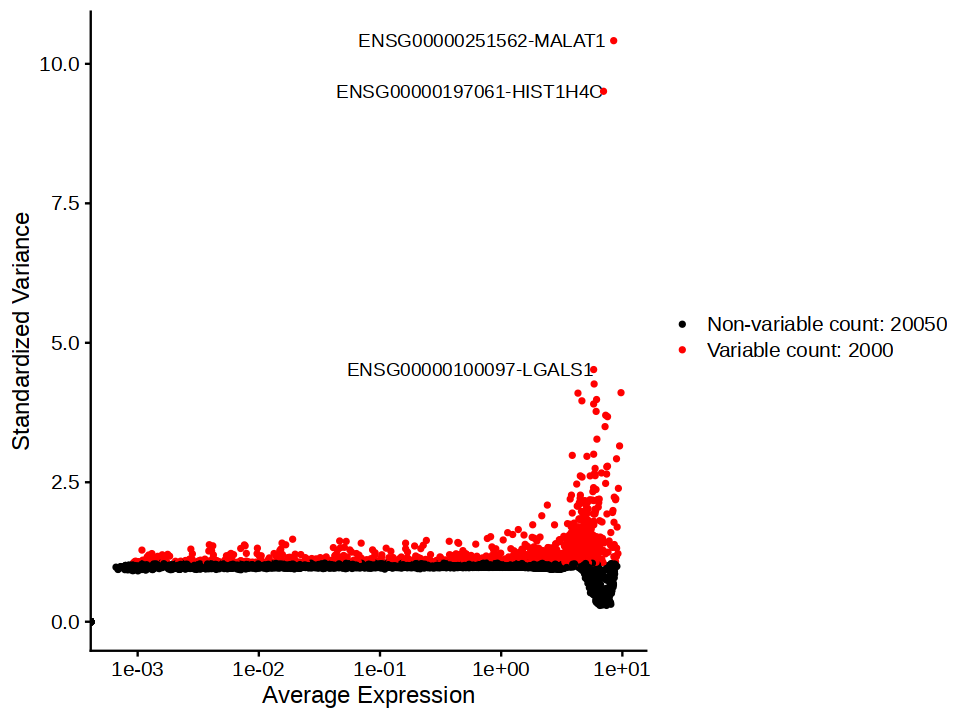

In [6]:
options(repr.plot.width=8, repr.plot.height=6)
rna  <- FindVariableFeatures(rna)
# protein <- FindVariableFeatures(protein)
top3 <- head(VariableFeatures(rna),3)
plot1 <- VariableFeaturePlot(rna)
plot2 <- LabelPoints(plot=plot1,points=top3,repel=T,xnudge=0,ynudge=0)
top3
plot2

In [16]:
head(VariableFeatures(rna),3)

[1] "ENSG00000251562-MALAT1"   "ENSG00000197061-HIST1H4C"
[3] "ENSG00000100097-LGALS1"

In [7]:
# head(VariableFeatures(rna),3)
variable_genes <- c("ENSG00000251562_MALAT1", 'ENSG00000197061_HIST1H4C','ENSG00000100097_LGALS1')
# rna_df[rownames(rna_df) %in% head(VariableFeatures(rna),3)]
filtered_rna_df <- as.data.frame(rna_df) %>%
    filter(rownames(rna_df) %in% variable_genes)
# rna_df %>%
#     filter(rownames(rna_df) %in% head(VariableFeatures(rna),3))

In [8]:
processed_metadata_df <- metadata_df
processed_metadata_df$cell_id <- row.names(processed_metadata_df)
head(processed_metadata_df)

day donor cell_type technology cell_id     
45006fe3e4c8 2   32606 HSC       citeseq    45006fe3e4c8
d02759a80ba2 2   32606 HSC       citeseq    d02759a80ba2
c016c6b0efa5 2   32606 EryP      citeseq    c016c6b0efa5
ba7f733a4f75 2   32606 NeuP      citeseq    ba7f733a4f75
fbcf2443ffb2 2   32606 EryP      citeseq    fbcf2443ffb2
d80d84ca8e89 2   32606 EryP      citeseq    d80d84ca8e89

In [9]:
variable_gene_df <- as.data.frame(t(filtered_rna_df))
variable_gene_df$cell_id <- row.names(variable_gene_df)
variable_gene_df <- variable_gene_df %>%
    left_join(processed_metadata_df, by=c("cell_id")) %>%
    pivot_longer(
        cols=c("ENSG00000197061_HIST1H4C","ENSG00000100097_LGALS1","ENSG00000251562_MALAT1"),
        names_to="gene",values_to="expression"
    )
head(variable_gene_df)
dim(variable_gene_df)

cell_id      day donor cell_type technology gene                    
1 45006fe3e4c8 2   32606 HSC       citeseq    ENSG00000197061_HIST1H4C
2 45006fe3e4c8 2   32606 HSC       citeseq    ENSG00000100097_LGALS1  
3 45006fe3e4c8 2   32606 HSC       citeseq    ENSG00000251562_MALAT1  
4 d02759a80ba2 2   32606 HSC       citeseq    ENSG00000197061_HIST1H4C
5 d02759a80ba2 2   32606 HSC       citeseq    ENSG00000100097_LGALS1  
6 d02759a80ba2 2   32606 HSC       citeseq    ENSG00000251562_MALAT1  
  expression
1 6.472749  
2 4.090185  
3 7.441190  
4 7.067158  
5 6.220996  
6 7.711110

[1] 212964      7

`summarise()` has grouped output by 'day', 'cell_type'. You can override using the
`.groups` argument.


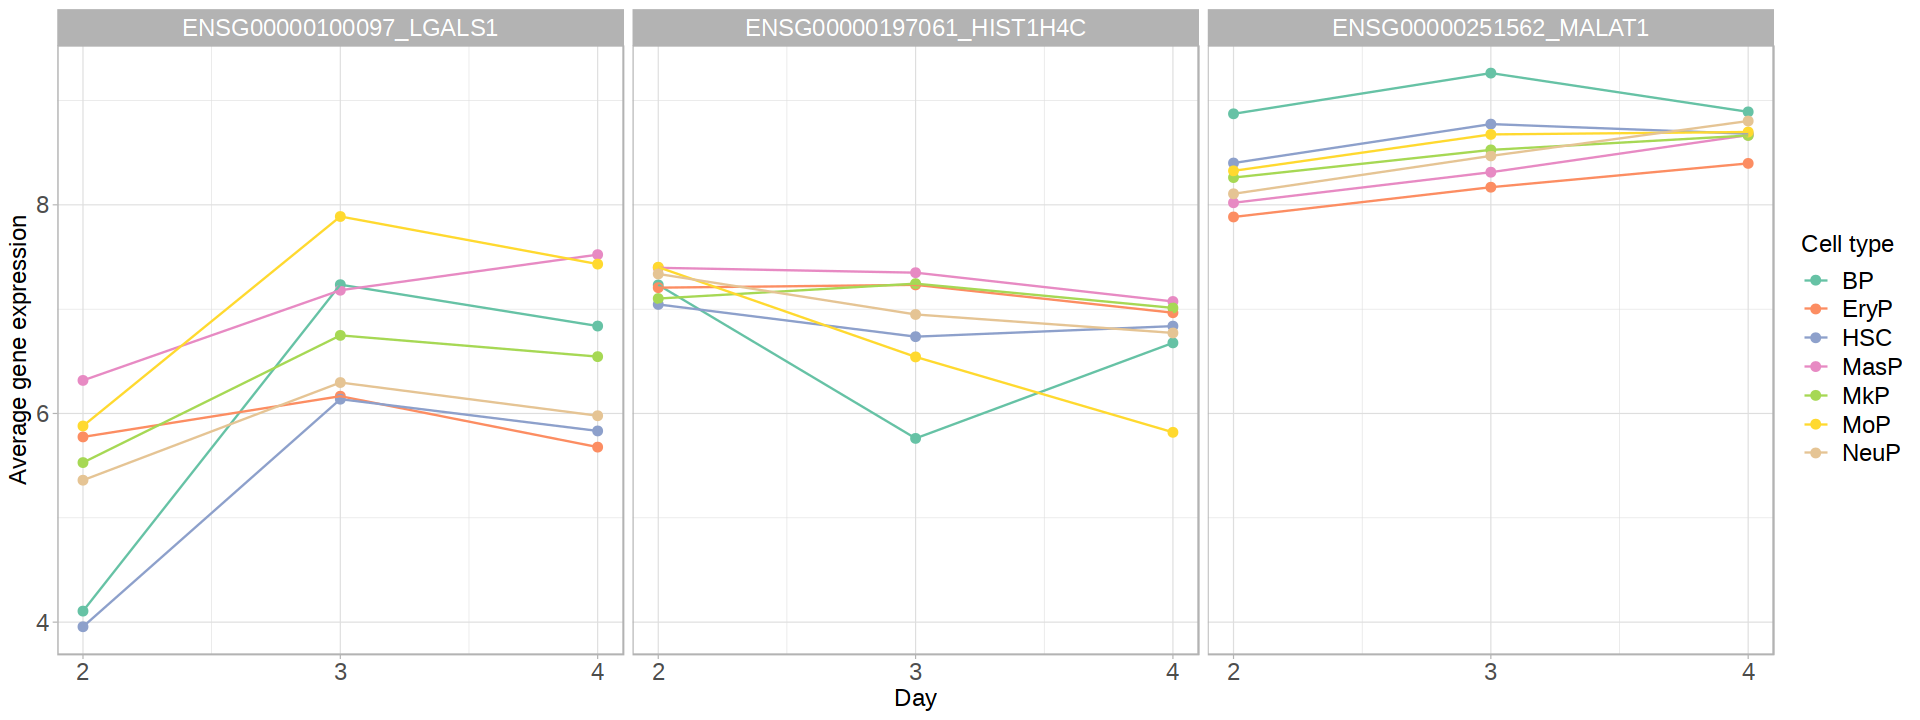

In [20]:
# Plotting time-course of differntially expressed genes
options(repr.plot.width=16, repr.plot.height=6)
variable_gene_df %>%
    group_by(day,cell_type,gene) %>%
    summarize(avg_expression = mean(expression)) %>%
    ggplot(aes(x=day,y=avg_expression,group=cell_type,color=cell_type)) +
        geom_point(size=2) +
        geom_line() +
        facet_wrap(~gene) +
        scale_color_brewer(palette="Set2",name="Cell type") +
        theme_light() +
        scale_x_continuous(breaks=seq(0,5,1)) +
        labs(x="Day",y="Average gene expression") +
        theme(
            axis.text = element_text(size=14),
            axis.title=  element_text(size=14),
            strip.text.x= element_text(size=14),
            legend.text= element_text(size=14),
            legend.title= element_text(size=14)
        )

In [199]:
rna <- RunPCA(rna,features=VariableFeatures(rna))
# DimPlot(rna, reduction="pca")

PC_ 1 
Positive:  CD31, CD44, CD244, CD49d, CD71, CD29, CD11a, CD33, CD47, CD162 
	   CD45, CD62L, CD49b, HLA.A.B.C, CD155, CD112, CD82, HLA.DR, CD81, CD9 
	   CD48, CD49f, CD63, CD18, CD224, CD88, CD58, CD38, CD13, CD32 
Negative:  CD3, CD196, IgD, CD27, CD16, Rat.IgG1, CD194, CD25, CD62P, Rat.IgG2a 
	   CD328, CD23, CD79b, CD94, TCRVd2, CD20, IgM, CD161, CD1c, CD64 
	   CD14, CD24, CD39, CD268, CD35, TCRVa7.2, CD158e1, CD42b, CD163, CD122 
PC_ 2 
Positive:  CD62L, CD11a, CD31, CD48, CD44, CD49b, CD45RA, CD244, HLA.A.B.C, CD123 
	   CD47, CD18, CD54, CD72, CD13, CD45, HLA.DR, CD81, CD52, CD112 
	   CD95, CD22, CD196, CD25, CD9, CD69, Rat.IgG2a, Rat.IgG1, CD79b, CD86 
Negative:  CD36, CD41, CD32, CD71, CD88, CD82, CD49d, FceRIa, CD115, CD26 
	   CD49f, CD158, CD58, CD162, CD29, CD272, CD33, CD38, CD224, CD103 
	   integrinB7, CD107a, CD85j, CD137, CD63, CD335, CD124, CD226, CD57, CD28 
PC_ 3 
Positive:  CD33, CD48, CD38, CD71, CD49d, CD162, CD32, CD88, CD26, CD82 
	   CD142, integrinB7

In [200]:
protein <- RunPCA(protein,features=VariableFeatures(protein))

PC_ 1 
Positive:  CD31, CD44, CD244, CD49d, CD71, CD29, CD11a, CD33, CD47, CD162 
	   CD45, CD62L, CD49b, HLA.A.B.C, CD155, CD112, CD82, HLA.DR, CD81, CD9 
	   CD48, CD49f, CD63, CD18, CD224, CD88, CD58, CD38, CD13, CD32 
Negative:  CD3, CD196, IgD, CD27, CD16, Rat.IgG1, CD194, CD25, CD62P, Rat.IgG2a 
	   CD328, CD23, CD79b, CD94, TCRVd2, CD20, IgM, CD161, CD1c, CD64 
	   CD14, CD24, CD39, CD268, CD35, TCRVa7.2, CD158e1, CD42b, CD163, CD122 
PC_ 2 
Positive:  CD62L, CD11a, CD31, CD48, CD44, CD49b, CD45RA, CD244, HLA.A.B.C, CD123 
	   CD47, CD18, CD54, CD72, CD13, CD45, HLA.DR, CD81, CD52, CD112 
	   CD95, CD22, CD196, CD25, CD9, CD69, Rat.IgG2a, Rat.IgG1, CD79b, CD86 
Negative:  CD36, CD41, CD32, CD71, CD88, CD82, CD49d, FceRIa, CD115, CD26 
	   CD49f, CD158, CD58, CD162, CD29, CD272, CD33, CD38, CD224, CD103 
	   integrinB7, CD107a, CD85j, CD137, CD63, CD335, CD124, CD226, CD57, CD28 
PC_ 3 
Positive:  CD33, CD48, CD38, CD71, CD49d, CD162, CD32, CD88, CD26, CD82 
	   CD142, integrinB7

In [ ]:
print(rna[["pca"]], dims = 1:5, nfeatures = 5)

In [ ]:
options(repr.plot.width=10, repr.plot.height=6)
VizDimLoadings(rna, dims = 1:2, reduction = "pca")

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
# DimPlot(rna, reduction = "pca", group.by="cell_type", split.by="day")
DimPlot(rna, reduction = "pca", split.by="day")

In [ ]:
rna <- FindNeighbors(rna)
rna <- RunTSNE(rna)
DimPlot(rna, reduction="tsne", split.by="day")

In [202]:
# protein <- FindNeighbors(protein)
# protein <- RunTSNE(protein)
# DimPlot(protein, reduction="tsne", split.by="day")

In [ ]:
options(repr.plot.width=20, repr.plot.height=20)

# Explore primary sources of heterogeneity between the cells and features that define the pcs
#  Both cells and features are ordered according to their PCA scores
# "Extreme" cells on both ends of the spectrum

DimHeatmap(rna, dims = 1:10, cells = 1000,nfeatures=10, ncol=5)

In [ ]:
options(repr.plot.width=6, repr.plot.height=6)
ElbowPlot(rna)

In [ ]:
rna <- RunUMAP(rna,dims=1:10)

In [ ]:
options(repr.plot.width=20, repr.plot.height=10)
DimPlot(rna,reduction="umap",label=T, split.by="day") + NoLegend()

In [ ]:
FeaturePlot(rna,features=c("ENSG00000251562-MALAT1"))

In [ ]:
marker_gene_dir  <- "/path/to/dataset/processed/seurat_marker_genes" 
for (celltype in c("BP","EryP","HSC","MasP","MkP","MoP","NeuP")) {
    celltype <- "NeuP"
    marker_gene_path <- paste0(marker_gene_dir,"/",celltype,"_marker_genes.csv")
    marker_genes_df <- head(read.csv(marker_gene_path,row.names=1),5)
    plot <- RidgePlot(rna, features=rownames(marker_genes_df),group.by="cell_type", ncol=5)
    print(celltype)
    print(plot)
    break
}

In [ ]:
options(repr.plot.width=18, repr.plot.height=6)
# RidgePlot(rna, features=head(VariableFeatures(rna)),group.by="cell_type")

celltype <- "BP"
marker_gene_dir  <- "/path/to/dataset/processed/seurat_marker_genes" 
marker_gene_path <- paste0(marker_gene_dir,"/",celltype,"_marker_genes.csv")
marker_genes_df <- head(read.csv(marker_gene_path,row.names=1),3)
marker_genes_df

for celltype in c()
RidgePlot(rna, features=rownames(marker_genes_df),group.by="cell_type")


In [ ]:
# head(rna@meta.data)
# VlnPlot(rna, features=c("nFeature_RNA","nCount_RNA"))
options(repr.plot.width=18, repr.plot.height=8)
VlnPlot(rna, "nCount_RNA", pt.size = 0.1, ncol = 1, group.by = "cell_type", split.by="day", sort="decreasing") +
    labs(y="RNA counts per cell",x="Cell type") +
    guides(fill=guide_legend(title="Day"))
VlnPlot(rna, "nFeature_RNA", pt.size = 0.1, ncol = 1, group.by = "cell_type", split.by="day") +
    labs(y="RNA counts per gene",x="Cell type") +
    guides(fill=guide_legend(title="Day"))

In [ ]:
DoHeatmap(rna, features = VariableFeatures(rna)[1:100], cells = 1:500, size = 4,
    angle = 90) + 
    NoLegend() + 
    scale_fill_viridis(option="turbo")

In [ ]:
out_dir <- "/path/to/dataset/processed/seurat_marker_genes"
for (celltype in levels(rna)) {
    markers_df <- FindMarkers(rna,ident.1=celltype)
    outpath <- paste0(out_dir,"/",celltype,"_marker_genes.csv")
}

In [ ]:
options(repr.plot.width=8, repr.plot.height=6)
ggplot(rna@meta.data, aes(nCount_RNA, nFeature_RNA, color = cell_type)) +
  geom_point(size = 0.5, alpha=0.5) +
  scale_color_brewer(type = "qual", palette = "Set2", name = "Cell type") +
  scale_x_log10() +
  scale_y_log10() +
  theme_bw() +
  # Make points larger in legend
  guides(color = guide_legend(override.aes = list(size = 3))) +
  labs(x = "Total UMI counts", y = "Number of genes detected")

In [ ]:
options(repr.plot.width=20, repr.plot.height=8)
DimPlot(rna,pt.size=0.5,reduction="umap",group.by="cell_type",split.by="day",ncol=3)

In [10]:
rna <- FindNeighbors(rna, verbose = F, dims = 1:50)

In [11]:
rna <- RunUMAP(rna, dims = 1:50, seed.use = 4867)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
06:46:29 UMAP embedding parameters a = 0.9922 b = 1.112

06:46:29 Read 70988 rows and found 50 numeric columns

06:46:29 Using Annoy for neighbor search, n_neighbors = 30

06:46:29 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:46:37 Writing NN index file to temp file /tmp/Rtmpi0QDK7/filef4924f50c063

06:46:37 Searching Annoy index using 1 thread, search_k = 3000

06:47:04 Annoy recall = 100%

06:47:05 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

# Slingshot trajectory inference

In [15]:
sds <- slingshot(Embeddings(rna, "umap"), clusterLabels = rna$cell_type, 
                 start.clus = "HSC", stretch = 0)

In [16]:
cell_pal <- function(cell_vars, pal_fun,...) {
  if (is.numeric(cell_vars)) {
    pal <- pal_fun(100, ...)
    return(pal[cut(cell_vars, breaks = 100)])
  } else {
    categories <- sort(unique(cell_vars))
    pal <- setNames(pal_fun(length(categories), ...), categories)
    return(pal[cell_vars])
  }
}

In [27]:
cell_colors <- cell_pal(rna$cell_type, brewer_pal("qual", "Set2"))
# cell_colors_clust <- cell_pal(rna$seurat_clusters, hue_pal())

In [43]:
lineages <- getLineages(data=sds, clusterLabels=rna$cell_type,start.clus = "HSC")
lineages

class: PseudotimeOrdering 
dim: 70988 2 
metadata(3): lineages mst slingParams
pathStats(2): pseudotime weights
cellnames(70988): 45006fe3e4c8 d02759a80ba2 ... 3a9882c98205
  c91b6b2ccd3d
cellData names(2): reducedDim clusterLabels
pathnames(2): Lineage1 Lineage2
pathData names(0):

In [77]:
test <- getCurves(sds,clusterLabels=rna$cell_type)

ERROR: Error in smooth.spline(lambda, xj, w = w, ..., df = df, tol = tol, keep.data = FALSE, : unused argument (clusterLabels = c("HSC", "HSC", "EryP", "NeuP", "EryP", "EryP", "HSC", "HSC", "MasP", "HSC", "NeuP", "NeuP", "HSC", "HSC", "HSC", "HSC", "EryP", "NeuP", "NeuP", "NeuP", "MkP", "HSC", "EryP", "HSC", "MasP", "NeuP", "HSC", "EryP", "HSC", "HSC", "MasP", "NeuP", "HSC", "HSC", "HSC", "HSC", "NeuP", "MkP", "MasP", "NeuP", "NeuP", "HSC", "EryP", "HSC", "MasP", "HSC", "EryP", "MasP", "HSC", "HSC", "NeuP", "NeuP", "EryP", "HSC", "MasP", "HSC", "NeuP", "EryP", "HSC", "HSC", "EryP", "EryP", "HSC", 
"EryP", "NeuP", "MkP", "NeuP", "HSC", "BP", "HSC", "NeuP", "HSC", "HSC", "MasP", "HSC", "MkP", "HSC", "EryP", "MasP", "NeuP", "HSC", "NeuP", "MasP", "HSC", "HSC", "NeuP", "HSC", "NeuP", "NeuP", "NeuP", "NeuP", "EryP", "MasP", "MasP", "HSC", "HSC", "HSC", "MkP", "NeuP", "NeuP", "EryP", "NeuP", "MasP", "HSC", "MoP", "EryP", "NeuP", "EryP", "HSC", "MasP", "MasP", "HSC", "HSC", "NeuP", "MkP", "MkP", "EryP", "HSC", "HSC", "HSC", "EryP", "HSC", "HSC", "NeuP", "HSC", "HSC", "MasP", "NeuP", "HSC", "EryP", 
"HSC", "HSC", "HSC", "HSC", "HSC", "MasP", "EryP", "HSC", "NeuP", "MkP", "HSC", "MasP", "HSC", "NeuP", "EryP", "HSC", "EryP", "NeuP", "HSC", "HSC", "HSC", "EryP", "EryP", "NeuP", "HSC", "EryP", "EryP", "MasP", "HSC", "HSC", "HSC", "HSC", "EryP", "HSC", "HSC", "EryP", "HSC", "HSC", "HSC", "HSC", "HSC", "NeuP", "NeuP", "EryP", "HSC", "MkP", "HSC", "NeuP", "MasP", "HSC", "MasP", "HSC", "HSC", "EryP", "NeuP", "HSC", "HSC", "HSC", "EryP", "MasP", "HSC", "HSC", "EryP", "NeuP", "EryP", "MkP", "HSC", "NeuP", 
"HSC", "HSC", "EryP", "NeuP", "NeuP", "HSC", "EryP", "EryP", "NeuP", "EryP", "HSC", "HSC", "MkP", "HSC", "HSC", "HSC", "EryP", "EryP", "NeuP", "MkP", "NeuP", "HSC", "MkP", "MasP", "HSC", "MasP", "HSC", "HSC", "EryP", "NeuP", "MkP", "NeuP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "NeuP", "EryP", "EryP", "HSC", "HSC", "HSC", "HSC", "HSC", "MasP", "HSC", "HSC", "NeuP", "HSC", "HSC", "NeuP", "HSC", "HSC", "HSC", "EryP", "EryP", "HSC", "EryP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "EryP", "NeuP", 
"HSC", "EryP", "HSC", "MasP", "EryP", "HSC", "MasP", "HSC", "EryP", "HSC", "HSC", "NeuP", "HSC", "NeuP", "HSC", "MasP", "EryP", "HSC", "EryP", "HSC", "EryP", "MasP", "HSC", "MasP", "HSC", "HSC", "NeuP", "HSC", "MkP", "HSC", "HSC", "MkP", "MasP", "HSC", "NeuP", "EryP", "EryP", "MkP", "HSC", "MasP", "HSC", "EryP", "HSC", "MasP", "EryP", "HSC", "HSC", "EryP", "HSC", "NeuP", "MkP", "NeuP", "HSC", "HSC", "HSC", "MkP", "HSC", "HSC", "MkP", "HSC", "HSC", "MasP", "NeuP", "EryP", "NeuP", "HSC", "HSC", "HSC", 
"HSC", "HSC", "MkP", "HSC", "NeuP", "HSC", "EryP", "MasP", "HSC", "EryP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "NeuP", "HSC", "HSC", "MasP", "HSC", "NeuP", "NeuP", "EryP", "HSC", "HSC", "NeuP", "HSC", "NeuP", "MasP", "MasP", "HSC", "NeuP", "HSC", "EryP", "MkP", "HSC", "NeuP", "NeuP", "MasP", "HSC", "MasP", "NeuP", "HSC", "MkP", "HSC", "EryP", "HSC", "EryP", "EryP", "HSC", "NeuP", "HSC", "EryP", "HSC", "HSC", "EryP", "EryP", "HSC", "HSC", "HSC", "NeuP", "NeuP", "MasP", "HSC", "HSC", "EryP", "MasP", 
"EryP", "MasP", "HSC", "EryP", "NeuP", "EryP", "NeuP", "NeuP", "MasP", "HSC", "EryP", "HSC", "HSC", "NeuP", "MkP", "MasP", "HSC", "HSC", "EryP", "NeuP", "HSC", "NeuP", "NeuP", "MkP", "EryP", "HSC", "MkP", "MkP", "MasP", "EryP", "NeuP", "EryP", "EryP", "HSC", "HSC", "NeuP", "HSC", "NeuP", "EryP", "EryP", "NeuP", "NeuP", "MasP", "HSC", "HSC", "MkP", "MkP", "NeuP", "HSC", "MoP", "MkP", "MasP", "HSC", "EryP", "NeuP", "MasP", "MasP", "MkP", "MasP", "MkP", "HSC", "HSC", "MkP", "EryP", "HSC", "EryP", "MkP", 
"EryP", "HSC", "HSC", "HSC", "HSC", "MasP", "HSC", "MkP", "HSC", "EryP", "MasP", "HSC", "EryP", "HSC", "MasP", "MkP", "HSC", "HSC", "MasP", "HSC", "HSC", "HSC", "HSC", "MasP", "NeuP", "EryP", "NeuP", "MasP", "MasP", "EryP", "EryP", "EryP", "MasP", "HSC", "HSC", "HSC", "NeuP", "NeuP", "NeuP", "HSC", "NeuP", "HSC", "EryP", "HSC", "MasP", "HSC", "HSC", "HSC", "MkP", "NeuP", "EryP", "EryP", "HSC", "NeuP", "NeuP", "MasP", "MasP", "HSC", "HSC", "MasP", "HSC", "HSC", "NeuP", "EryP", "HSC", "BP", "EryP", 
"MkP", "MasP", "MkP", "EryP", "HSC", "HSC", "NeuP", "HSC", "EryP", "EryP", "HSC", "NeuP", "EryP", "EryP", "EryP", "HSC", "NeuP", "MkP", "EryP", "NeuP", "HSC", "HSC", "NeuP", "HSC", "MkP", "HSC", "MasP", "MkP", "MasP", "HSC", "MasP", "HSC", "HSC", "HSC", "MasP", "EryP", "EryP", "MkP", "MasP", "HSC", "HSC", "MkP", "HSC", "MkP", "MkP", "NeuP", "MkP", "MasP", "NeuP", "NeuP", "MasP", "HSC", "HSC", "HSC", "NeuP", "NeuP", "EryP", "MkP", "HSC", "EryP", "NeuP", "EryP", "HSC", "EryP", "MkP", "HSC", "EryP", 
"EryP", "HSC", "MasP", "HSC", "HSC", "MasP", "NeuP", "EryP", "MasP", "MasP", "EryP", "NeuP", "HSC", "MasP", "HSC", "HSC", "BP", "HSC", "NeuP", "HSC", "EryP", "EryP", "MasP", "EryP", "MasP", "HSC", "EryP", "HSC", "HSC", "HSC", "MasP", "HSC", "HSC", "MoP", "EryP", "MasP", "HSC", "HSC", "MkP", "EryP", "HSC", "MasP", "HSC", "HSC", "HSC", "EryP", "HSC", "MkP", "MkP", "MasP", "NeuP", "HSC", "EryP", "HSC", "HSC", "HSC", "EryP", "MkP", "HSC", "NeuP", "HSC", "NeuP", "HSC", "NeuP", "HSC", "NeuP", "HSC", "HSC", 
"MkP", "HSC", "EryP", "HSC", "HSC", "HSC", "HSC", "NeuP", "EryP", "HSC", "HSC", "MkP", "HSC", "HSC", "HSC", "MasP", "NeuP", "HSC", "HSC", "HSC", "EryP", "EryP", "HSC", "HSC", "MasP", "EryP", "HSC", "EryP", "NeuP", "MasP", "MkP", "MkP", "MkP", "HSC", "HSC", "MasP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "EryP", "HSC", "NeuP", "HSC", "EryP", "MasP", "MasP", "HSC", "HSC", "HSC", "MkP", "EryP", "HSC", "HSC", "EryP", "NeuP", "HSC", "HSC", "NeuP", "HSC", "NeuP", "HSC", "HSC", "MkP", "HSC", "HSC", "HSC", 
"HSC", "HSC", "HSC", "MkP", "MkP", "HSC", "MasP", "HSC", "EryP", "EryP", "NeuP", "HSC", "MasP", "MkP", "MkP", "HSC", "MasP", "NeuP", "HSC", "NeuP", "MasP", "HSC", "MkP", "EryP", "MkP", "NeuP", "EryP", "EryP", "NeuP", "HSC", "NeuP", "EryP", "HSC", "HSC", "HSC", "MkP", "HSC", "HSC", "HSC", "HSC", "NeuP", "HSC", "HSC", "HSC", "HSC", "NeuP", "HSC", "HSC", "NeuP", "HSC", "NeuP", "HSC", "NeuP", "EryP", "MasP", "MasP", "NeuP", "NeuP", "HSC", "HSC", "EryP", "EryP", "EryP", "HSC", "NeuP", "EryP", "HSC", "HSC", 
"HSC", "MkP", "NeuP", "NeuP", "EryP", "HSC", "NeuP", "EryP", "HSC", "HSC", "EryP", "HSC", "HSC", "HSC", "HSC", "EryP", "HSC", "MasP", "MkP", "EryP", "NeuP", "NeuP", "HSC", "HSC", "HSC", "NeuP", "MkP", "EryP", "MasP", "NeuP", "EryP", "MkP", "MkP", "EryP", "NeuP", "MasP", "NeuP", "HSC", "HSC", "MkP", "EryP", "HSC", "HSC", "NeuP", "MasP", "BP", "NeuP", "EryP", "HSC", "EryP", "HSC", "MkP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "MasP", "EryP", "EryP", "HSC", "HSC", "NeuP", "MasP", "EryP", "HSC", "EryP", 
"MasP", "HSC", "HSC", "HSC", "HSC", "MasP", "EryP", "NeuP", "MkP", "MasP", "MkP", "NeuP", "HSC", "HSC", "EryP", "NeuP", "HSC", "HSC", "HSC", "EryP", "EryP", "HSC", "MkP", "HSC", "HSC", "HSC", "MkP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "EryP", "EryP", "HSC", "NeuP", "HSC", "HSC", "HSC", "NeuP", "HSC", "MasP", "NeuP", "HSC", "HSC", "HSC", "MasP", "EryP", "EryP", "NeuP", "EryP", "NeuP", "HSC", "EryP", "HSC", "NeuP", "NeuP", "NeuP", "EryP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", 
"EryP", "NeuP", "HSC", "EryP", "HSC", "HSC", "HSC", "MkP", "MkP", "HSC", "HSC", "HSC", "MkP", "BP", "HSC", "NeuP", "HSC", "NeuP", "NeuP", "EryP", "HSC", "EryP", "HSC", "EryP", "EryP", "HSC", "EryP", "MasP", "HSC", "MkP", "MasP", "HSC", "MasP", "HSC", "HSC", "HSC", "HSC", "MkP", "EryP", "EryP", "BP", "HSC", "MasP", "HSC", "MasP", "NeuP", "HSC", "HSC", "HSC", "NeuP", "HSC", "HSC", "HSC", "HSC", "NeuP", "NeuP", "NeuP", "MkP", "HSC", "MkP", "MasP", "HSC", "HSC", "HSC", "NeuP", "NeuP", "MkP", "HSC", "HSC", 
"MasP", "NeuP", "NeuP", "HSC", "EryP", "HSC", "HSC", "EryP", "NeuP", "HSC", "HSC", "HSC", "NeuP", "HSC", "NeuP", "MkP", "MasP", "MasP", "HSC", "HSC", "NeuP", "HSC", "HSC", "MasP", "MasP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "MasP", "EryP", "HSC", "MkP", "HSC", "HSC", "HSC", "NeuP", "EryP", "HSC", "HSC", "NeuP", "HSC", "MkP", "HSC", "HSC", "MasP", "NeuP", "MasP", "NeuP", "HSC", "NeuP", "NeuP", "HSC", "HSC", "HSC", "NeuP", "MkP", "HSC", "HSC", "HSC", "NeuP", "MkP", "EryP", "HSC", "HSC", "MkP", 
"EryP", "MasP", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC", "HSC


ERROR: Error in xy.coords(x, y): 'x' is a list, but does not have components 'x' and 'y'


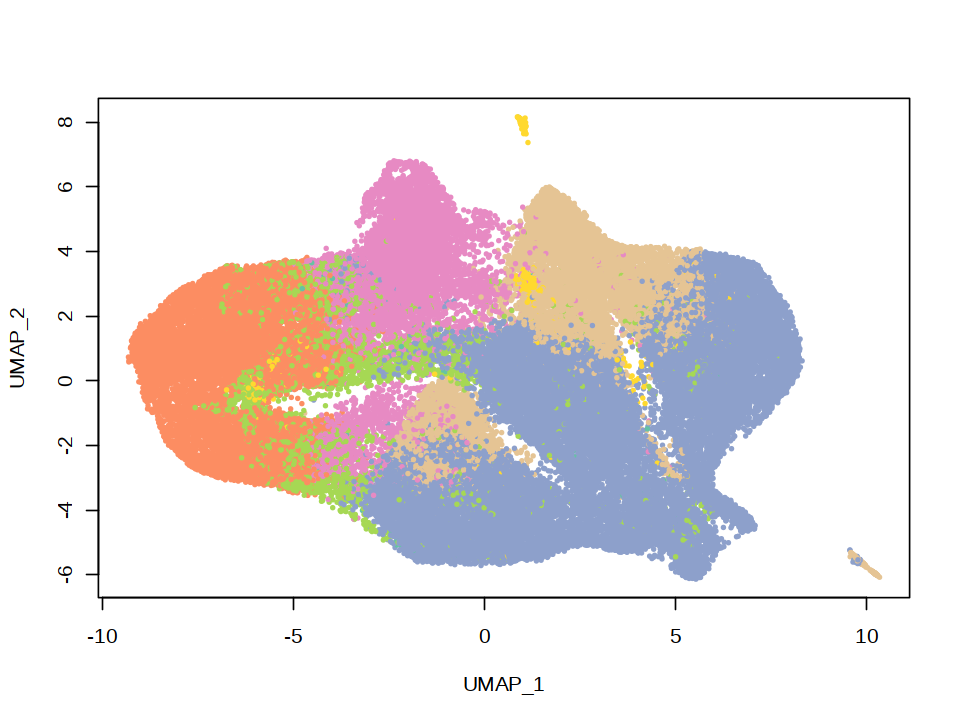

In [66]:
plot(slingReducedDim(sds), col = cell_colors, pch = 16, cex = 0.5)
lines(slingCurves(sds)[1])
# lines(sds, lwd = 2, type = "lineage", col = 'black')
# lines(sds)
# lines(sds, lwd = 2, col = 'black')

ERROR: Error in xy.coords(x, y): 'x' is a list, but does not have components 'x' and 'y'


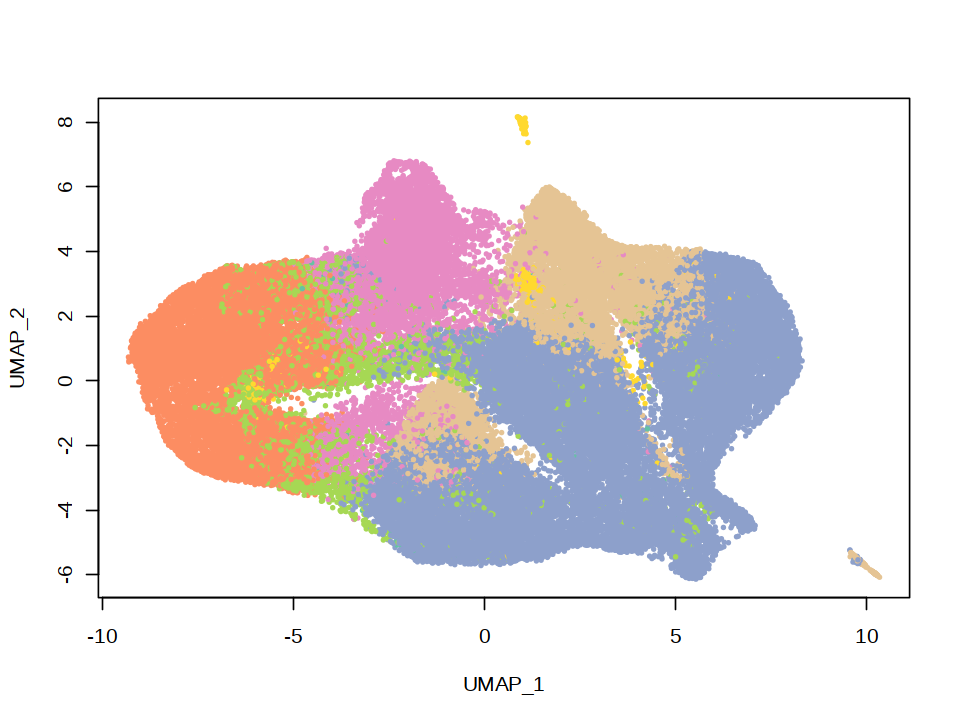

In [62]:
# slingCurves(sds)
plot(slingReducedDim(sds), col = cell_colors, pch = 16, cex = 0.5)
lines(slingLineages(sds))

In [ ]:
# plot(reducedDim(sds), col = cell_colors_clust, pch = 16, cex = 0.5)
# lines(sds, lwd = 2, type = 'lineages', col = 'black')

In [32]:
plot(reducedDim(sds), col = cell_colors, pch = 16, cex = 0.5)
lines(sds, lwd = 2, col = 'black')

ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'plot': unable to find an inherited method for function ‘reducedDim’ for signature ‘"PseudotimeOrdering", "missing"’


In [ ]:
nc <- 3
pt <- slingPseudotime(sds)
nms <- colnames(pt)
nr <- ceiling(length(nms)/nc)
pal <- viridis(100, end = 0.95)
par(mfrow = c(nr, nc))
for (i in nms) {
  colors <- pal[cut(pt[,i], breaks = 100)]
  plot(reducedDim(sds), col = colors, pch = 16, cex = 0.5, main = i)
  lines(sds, lwd = 2, col = 'black', type = 'lineages')
}

In [ ]:
DimPlot(rna,pt.size=0.5,reduction="umap",group.by="seurat_clusters",split.by="day")

# Monocle3

In [78]:
expression_matrix <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_expression.rds"))
cell_metadata <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_colData.rds"))
gene_annotation <- readRDS(url("https://depts.washington.edu:/trapnell-lab/software/monocle3/celegans/data/packer_embryo_rowData.rds"))

In [114]:
# GetAssayData(rna,slot="counts")
# metadata_df["cell"] <- rownames(metadata_df)
# head(metadata_df)

gene_metadata <- data.frame("id"=rownames(GetAssayData(rna,slot="counts")))
rownames(gene_metadata) <- gene_metadata$id
gene_metadata <- gene_metadata %>%
    separate(id, into=c("ENSG","gene_short_name"),sep="\\-")
dim(gene_metadata)

[1] 22050     2

In [126]:
metadata_subset <- metadata_df %>%
    filter(day==4)
dim(metadata_subset)

[1] 28145     4

In [115]:
head(gene_metadata)

ENSG            gene_short_name
ENSG00000121410-A1BG     ENSG00000121410 A1BG           
ENSG00000268895-A1BG.AS1 ENSG00000268895 A1BG.AS1       
ENSG00000175899-A2M      ENSG00000175899 A2M            
ENSG00000245105-A2M.AS1  ENSG00000245105 A2M.AS1        
ENSG00000166535-A2ML1    ENSG00000166535 A2ML1          
ENSG00000128274-A4GALT   ENSG00000128274 A4GALT

In [116]:
cds <- new_cell_data_set(
    GetAssayData(rna,slot="counts"),
    cell_metadata = metadata_df,
    gene_metadata = gene_metadata
)

In [117]:
cds <- preprocess_cds(cds, num_dim = 50)

No preprocess_method specified, using preprocess_method = 'PCA'

No trajectory to plot. Has learn_graph() been called yet?



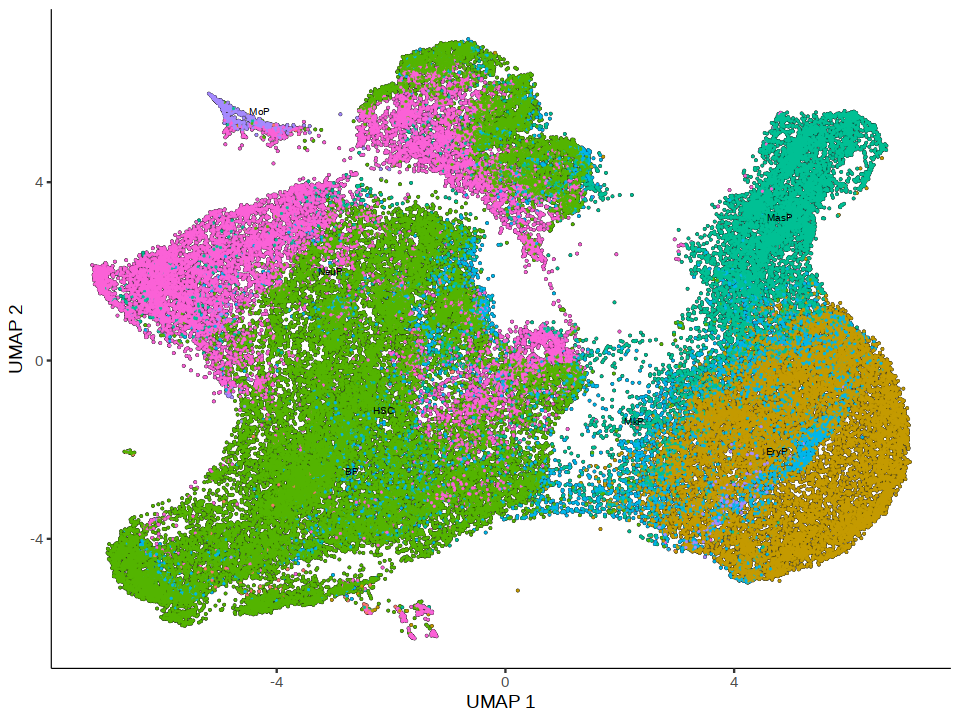

In [119]:
cds <- reduce_dimension(cds)
plot_cells(cds, label_groups_by_cluster=FALSE,  color_cells_by = "cell_type")     

No trajectory to plot. Has learn_graph() been called yet?



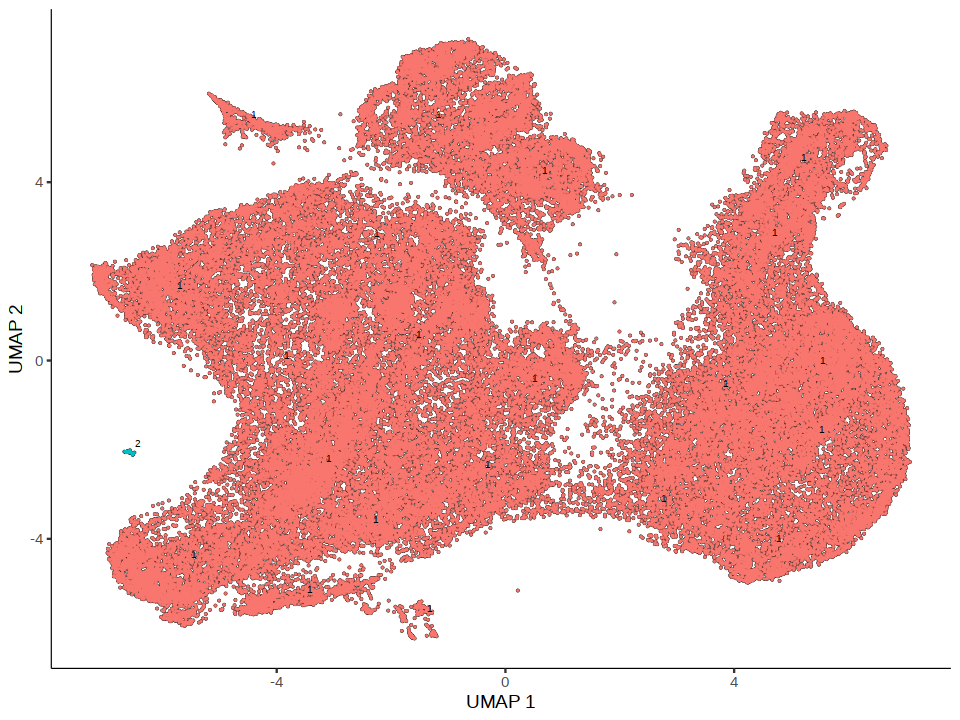

In [120]:
cds <- cluster_cells(cds)
plot_cells(cds, color_cells_by = "partition")

  |======================================================================| 100%


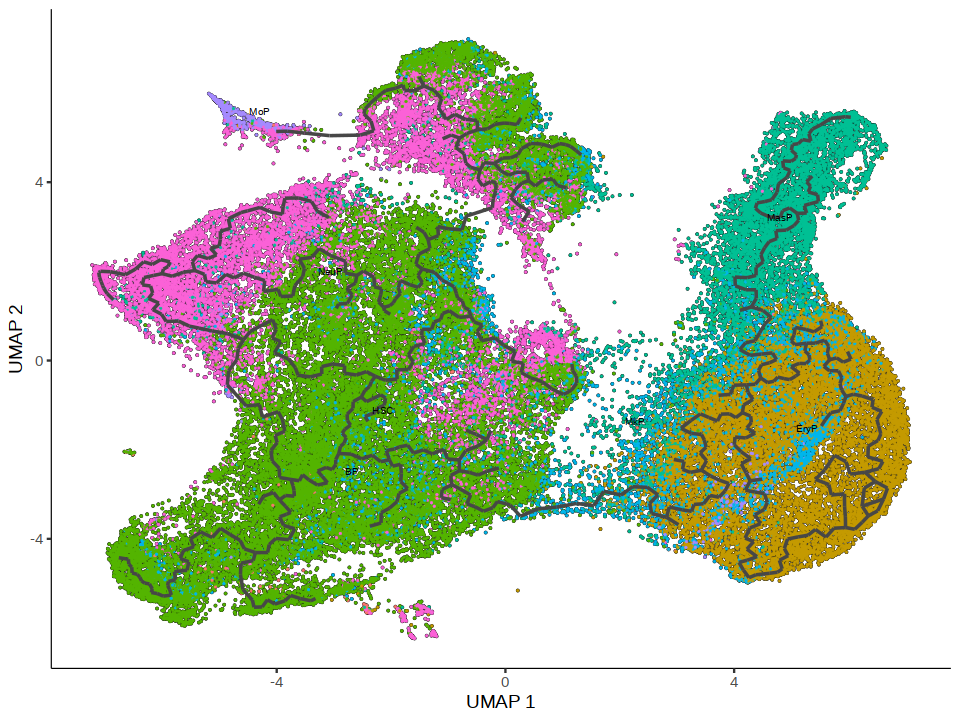

In [122]:
cds <- learn_graph(cds)
plot_cells(cds,
           color_cells_by = "cell_type",
           label_groups_by_cluster=FALSE,
           label_leaves=FALSE,
           label_branch_points=FALSE)

In [141]:
dim(metadata_subset)

[1] 28145     4

In [171]:
# gene_metadata           <- data.frame("id"=rownames(GetAssayData(rna,slot="counts")))
# rownames(gene_metadata) <- gene_metadata$id
# gene_metadata           <- gene_metadata %>%
#     separate(id, into = c("ENSG","gene_short_name"),sep="\\-")
# for (day in c(2,3,4)) {
#     metadata_subset_df  <- metadata_df %>% filter(day==day)
#     rna_subset_df       <- rna_df[,colnames(rna_df) %in% rownames(metadata_subset_df)]
#     rna_subset          <- CreateSeuratObject(
#         counts = rna_subset_df,
#         project = "cs547",
#         assay = "RNA",
#         meta.data = metadata_subset_df
#     )
#     cds <- new_cell_data_set(
#         GetAssayData(rna_subset,slot="counts"),
#         cell_metadata = metadata_subset_df,
#         gene_metadata = gene_metadata
#     )
#     cds <- preprocess_cds(cds, num_dim = 30)
#     cds <- reduce_dimension(cds)
#     cds <- cluster_cells(cds)
#     cds <- learn_graph(cds)
#     plot_cells(cds,
#                color_cells_by = "cell_type",
#                label_groups_by_cluster=T,
#                label_leaves=T,
#                label_branch_points=F)
# }

In [170]:
get_earliest_principal_node <- function(cds, day=2){
  cell_ids <- which(colData(cds)[, "day"] == day)
  
  closest_vertex <-
  cds@principal_graph_aux[["UMAP"]]$pr_graph_cell_proj_closest_vertex
  closest_vertex <- as.matrix(closest_vertex[colnames(cds), ])
  root_pr_nodes <-
  igraph::V(principal_graph(cds)[["UMAP"]])$name[as.numeric(names
  (which.max(table(closest_vertex[cell_ids,]))))]
  
  root_pr_nodes
}

In [172]:
metadata_subset_df  <- metadata_df %>% filter(day==2)
rna_subset_df       <- rna_df[,colnames(rna_df) %in% rownames(metadata_subset_df)]
rna_subset          <- CreateSeuratObject(
    counts = rna_subset_df,
    project = "cs547",
    assay = "RNA",
    meta.data = metadata_subset_df
)
cds <- new_cell_data_set(
    GetAssayData(rna_subset,slot="counts"),
    cell_metadata = metadata_subset_df,
    gene_metadata = gene_metadata
)
cds <- preprocess_cds(cds, num_dim = 30)
cds <- reduce_dimension(cds)
cds <- cluster_cells(cds)
cds <- learn_graph(cds)
options(repr.plot.width=10, repr.plot.height=8)
# plot_cells(
#     cds,
#     color_cells_by = "cell_type",
#     label_groups_by_cluster=F,
#     label_leaves=T,
#     label_branch_points=F,
#     graph_label_size = 5,
#     alpha=0.75
#     ) +
#     scale_color_brewer(palette="Set2") +
#     labs(subtitle="Day 2") +
#     theme(
#         legend.position="right",
#         axis.text = element_text(size=14),
#         axis.title = element_text(size=14),
#         text = element_text(size=14),
#     ) +
#     guides(color=guide_legend(title="Cell type",override.aes = list(size = 3)))
cds <- order_cells(cds)
plot_cells(
    cds,
    color_cells_by = "pseudotime",
    label_groups_by_cluster=F,
    label_leaves=T,
    label_branch_points=F,
    graph_label_size = 5,
    alpha=0.75
    ) +
    # scale_color_brewer(palette="Set2",name="Cell type") +
    labs(subtitle="Day 2") +
    theme(
        legend.position="right",
        axis.text = element_text(size=14),
        axis.title = element_text(size=14),
        text = element_text(size=14),
    )

Cells aren't colored in a way that allows them to be grouped.



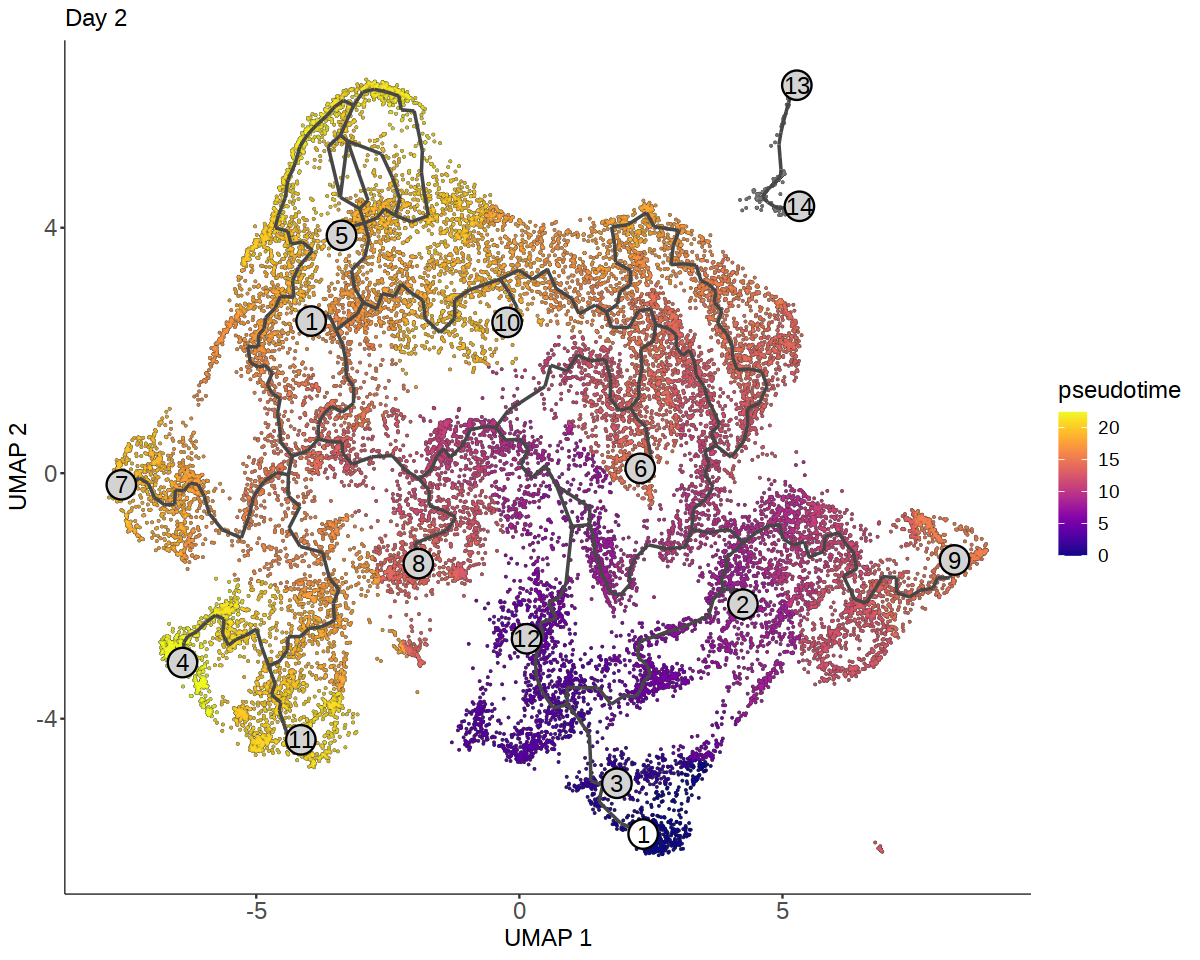

In [169]:
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds))
plot_cells(
    cds,
    color_cells_by = "pseudotime",
    label_groups_by_cluster=F,
    label_leaves=T,
    label_branch_points=F,
    graph_label_size = 5,
    alpha=0.75
    ) +
    # scale_color_brewer(palette="Set2",name="Cell type") +
    labs(subtitle="Day 2") +
    theme(
        legend.position="right",
        axis.text = element_text(size=14),
        axis.title = element_text(size=14),
        text = element_text(size=14),
    )

In [174]:
metadata_subset_df  <- metadata_df %>% filter(day==3)
rna_subset_df       <- rna_df[,colnames(rna_df) %in% rownames(metadata_subset_df)]
rna_subset          <- CreateSeuratObject(
    counts = rna_subset_df,
    project = "cs547",
    assay = "RNA",
    meta.data = metadata_subset_df
)
cds <- new_cell_data_set(
    GetAssayData(rna_subset,slot="counts"),
    cell_metadata = metadata_subset_df,
    gene_metadata = gene_metadata
)
cds <- preprocess_cds(cds, num_dim = 30)
cds <- reduce_dimension(cds)
cds <- cluster_cells(cds)
cds <- learn_graph(cds)
options(repr.plot.width=10, repr.plot.height=8)
# plot_cells(
#     cds,
#     color_cells_by = "cell_type",
#     label_groups_by_cluster=F,
#     label_leaves=T,
#     label_branch_points=F,
#     graph_label_size = 5,
#     alpha=0.75
#     ) +
#     scale_color_brewer(palette="Set2") +
#     labs(subtitle="Day 3") +
#     theme(
#         legend.position="right",
#         axis.text = element_text(size=14),
#         axis.title = element_text(size=14),
#         text = element_text(size=14),
#     ) +
#     guides(color=guide_legend(title="Cell type",override.aes = list(size = 3)))

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
No preprocess_method specified, using preprocess_method = 'PCA'



  |======================================================================| 100%
  |======================================================================| 100%


Warning message in find_nearest_vertex(Y[, root_pr_nodes, drop = FALSE], Z):
“bad loop: num_blocks < 1”


ERROR: Error in data_matrix[, ((((i - 1) * block_size) + 1):(ncol(data_matrix)))]: subscript out of bounds


Cells aren't colored in a way that allows them to be grouped.



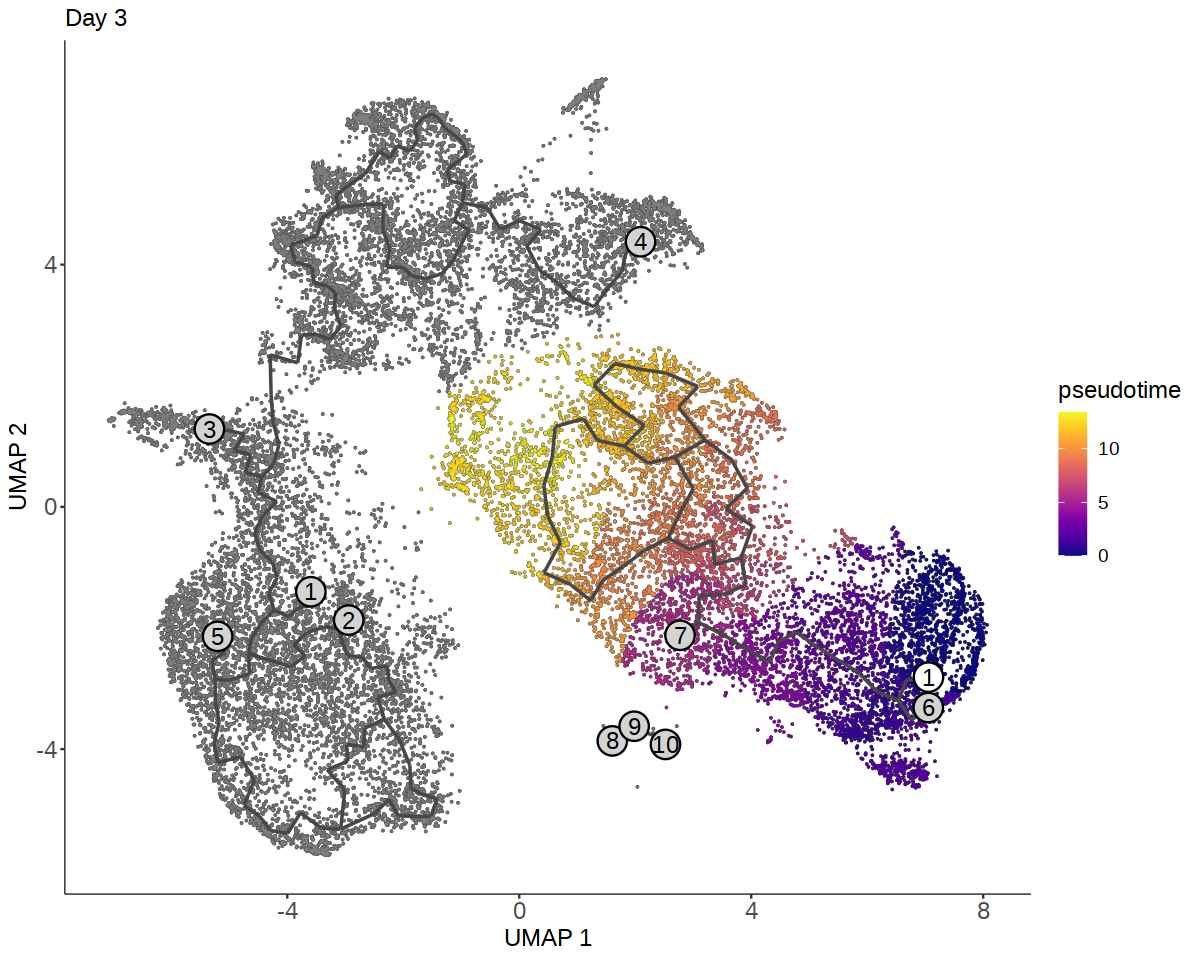

In [175]:
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds,3))
plot_cells(
    cds,
    color_cells_by = "pseudotime",
    label_groups_by_cluster=F,
    label_leaves=T,
    label_branch_points=F,
    graph_label_size = 5,
    alpha=0.75
    ) +
    # scale_color_brewer(palette="Set2",name="Cell type") +
    labs(subtitle="Day 3") +
    theme(
        legend.position="right",
        axis.text = element_text(size=14),
        axis.title = element_text(size=14),
        text = element_text(size=14),
    )

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
No preprocess_method specified, using preprocess_method = 'PCA'



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cells aren't colored in a way that allows them to be grouped.



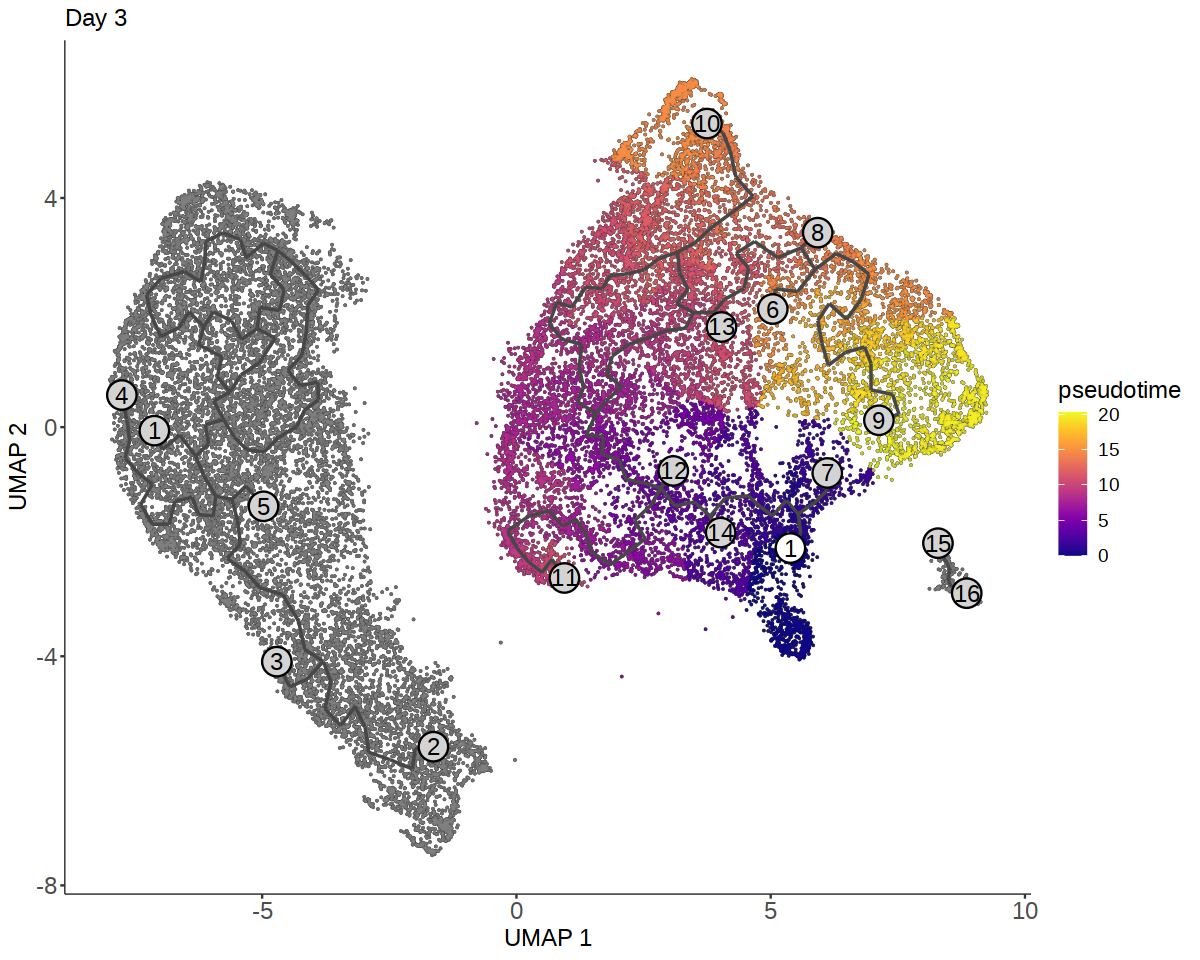

In [176]:
metadata_subset_df  <- metadata_df %>% filter(day==4)
rna_subset_df       <- rna_df[,colnames(rna_df) %in% rownames(metadata_subset_df)]
rna_subset          <- CreateSeuratObject(
    counts = rna_subset_df,
    project = "cs547",
    assay = "RNA",
    meta.data = metadata_subset_df
)
cds <- new_cell_data_set(
    GetAssayData(rna_subset,slot="counts"),
    cell_metadata = metadata_subset_df,
    gene_metadata = gene_metadata
)
cds <- preprocess_cds(cds, num_dim = 30)
cds <- reduce_dimension(cds)
cds <- cluster_cells(cds)
cds <- learn_graph(cds)
options(repr.plot.width=10, repr.plot.height=8)
# plot_cells(
#     cds,
#     color_cells_by = "cell_type",
#     label_groups_by_cluster=F,
#     label_leaves=T,
#     label_branch_points=F,
#     graph_label_size = 5,
#     alpha=0.75
#     ) +
#     scale_color_brewer(palette="Set2") +
#     labs(subtitle="Day 4") +
#     theme(
#         legend.position="right",
#         axis.text = element_text(size=14),
#         axis.title = element_text(size=14),
#         text = element_text(size=14),
#     ) +
#     guides(color=guide_legend(title="Cell type",override.aes = list(size = 3)))
cds <- order_cells(cds, root_pr_nodes=get_earliest_principal_node(cds,4))
plot_cells(
    cds,
    color_cells_by = "pseudotime",
    label_groups_by_cluster=F,
    label_leaves=T,
    label_branch_points=F,
    graph_label_size = 5,
    alpha=0.75
    ) +
    # scale_color_brewer(palette="Set2",name="Cell type") +
    labs(subtitle="Day 3") +
    theme(
        legend.position="right",
        axis.text = element_text(size=14),
        axis.title = element_text(size=14),
        text = element_text(size=14),
    )